In [1]:
!paddleocr --image_dir ./cut_image_0.jpg --use_angle_cls true --use_gpu false

download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to C:\Users\pduy3/.paddleocr/whl\cls\ch_ppocr_mobile_v2.0_cls_infer\ch_ppocr_mobile_v2.0_cls_infer.tar
[2024/10/04 14:18:50] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='./cut_image_0.jpg', page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=


  0%|          | 0.00/2.19M [00:00<?, ?iB/s]
  3%|▎         | 68.6k/2.19M [00:00<00:03, 548kiB/s]
 11%|█         | 232k/2.19M [00:00<00:01, 1.09MiB/s]
 23%|██▎       | 493k/2.19M [00:00<00:00, 1.73MiB/s]
 32%|███▏      | 708k/2.19M [00:00<00:00, 1.76MiB/s]
 46%|████▌     | 1.00M/2.19M [00:00<00:00, 2.13MiB/s]
 56%|█████▌    | 1.22M/2.19M [00:00<00:00, 1.57MiB/s]
 80%|████████  | 1.76M/2.19M [00:00<00:00, 2.42MiB/s]
 94%|█████████▍| 2.07M/2.19M [00:01<00:00, 2.14MiB/s]
100%|██████████| 2.19M/2.19M [00:01<00:00, 2.02MiB/s]


OCR Text: 配合計画, Confidence: 0.8092082738876343


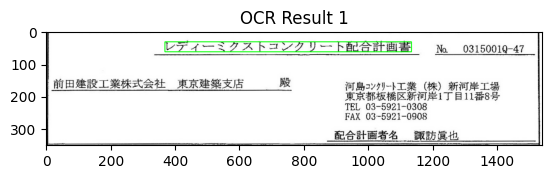

OCR Text: No.0315001Q-47, Confidence: 0.9950580596923828


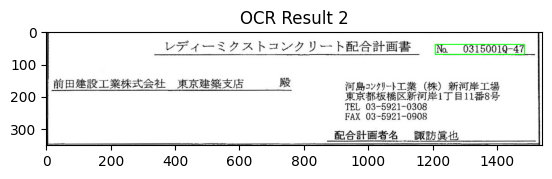

OCR Text: 前田建設工業株式会社東京建支店, Confidence: 0.919515073299408


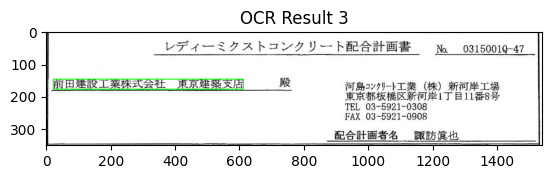

OCR Text: 殿, Confidence: 0.9998683929443359


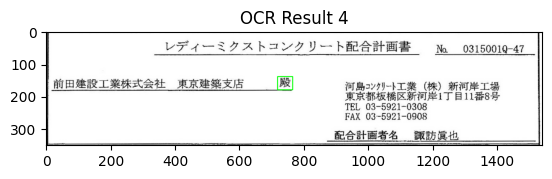

OCR Text: 河島工業（株）新河岸工場, Confidence: 0.9019336104393005


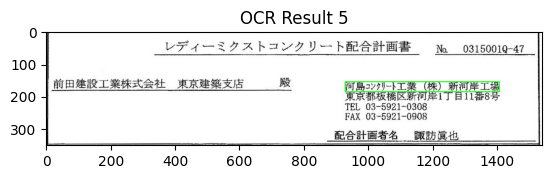

OCR Text: 东京都板橘区新河岸1丁目11番8号, Confidence: 0.926702618598938


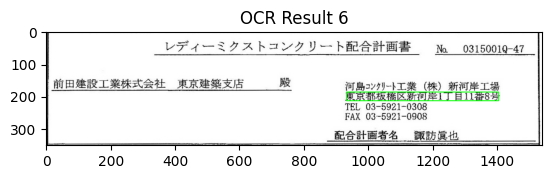

OCR Text: TEL 03-5921-0308, Confidence: 0.9707655310630798


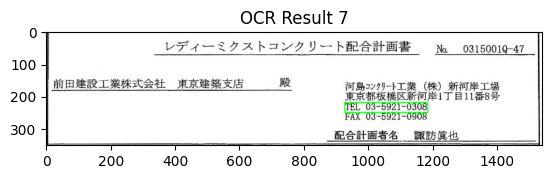

OCR Text: FAX 03-5921-0908, Confidence: 0.9792159795761108


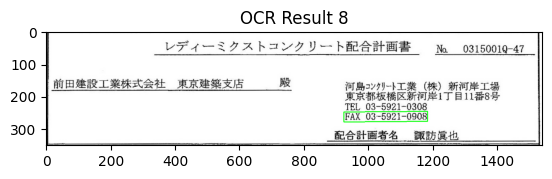

OCR Text: 配合計画者名, Confidence: 0.9132694602012634


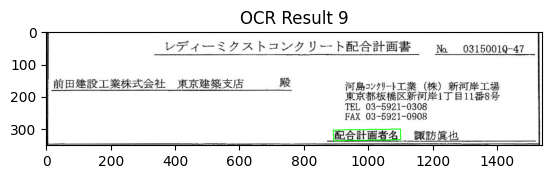

OCR Text: 訪眞也, Confidence: 0.7196018099784851


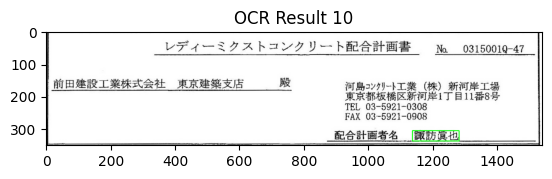

: 

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ảnh đầu vào (ví dụ)
image = cv2.imread('cut_image_0.jpg')

# Danh sách box chứa tọa độ và kết quả OCR (từ log của bạn)
ocr_data = [
    [[[369.0, 30.0], [1135.0, 30.0], [1135.0, 61.0], [369.0, 61.0]], ('配合計画', 0.8092082738876343)],
    [[[1209.0, 38.0], [1486.0, 38.0], [1486.0, 69.0], [1209.0, 69.0]], ('No.0315001Q-47', 0.9950580596923828)],
    [[[22.0, 146.0], [613.0, 146.0], [613.0, 177.0], [22.0, 177.0]], ('前田建設工業株式会社東京建支店', 0.919515073299408)],
    [[[719.0, 138.0], [766.0, 138.0], [766.0, 179.0], [719.0, 179.0]], ('殿', 0.9998683929443359)],
    [[[929.0, 154.0], [1408.0, 154.0], [1408.0, 185.0], [929.0, 185.0]], ('河島工業（株）新河岸工場', 0.9019336104393005)],
    [[[933.0, 186.0], [1406.0, 186.0], [1406.0, 213.0], [933.0, 213.0]], ('东京都板橘区新河岸1丁目11番8号', 0.926702618598938)],
    [[[928.0, 218.0], [1186.0, 218.0], [1186.0, 249.0], [928.0, 249.0]], ('TEL 03-5921-0308', 0.9707655310630798)],
    [[[925.0, 248.0], [1185.0, 246.0], [1185.0, 277.0], [925.0, 279.0]], ('FAX 03-5921-0908', 0.9792159795761108)],
    [[[892.0, 304.0], [1101.0, 301.0], [1101.0, 334.0], [893.0, 337.0]], ('配合計画者名', 0.9132694602012634)],
    [[[1138.0, 306.0], [1283.0, 306.0], [1283.0, 338.0], [1138.0, 338.0]], ('訪眞也', 0.7196018099784851)]
]

# Duyệt qua các kết quả OCR
for idx, data in enumerate(ocr_data):
    # Tạo bản sao của ảnh gốc để không thay đổi ảnh gốc trong mỗi vòng lặp
    image_copy = image.copy()
    
    # Lấy tọa độ và kết quả OCR
    points, (text, confidence) = data
    
    # Chuyển đổi tọa độ về dạng NumPy array
    points = np.array(points, np.int32)
    points = points.reshape((-1, 1, 2))  # Định dạng lại để phù hợp với yêu cầu của cv2.polylines
    
    # Vẽ tứ giác bao quanh
    cv2.polylines(image_copy, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    
    # In ra nội dung OCR và độ chính xác
    print(f"OCR Text: {text}, Confidence: {confidence}")

    # Hiển thị ảnh đã khoanh vùng
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"OCR Result {idx+1}")
    plt.show()


In [19]:
!paddleocr --image_dir ./cut_image_1.jpg --use_angle_cls true --use_gpu false

[2024/10/04 14:38:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='./cut_image_1.jpg', page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

OCR Text: 工事名称, Confidence: 0.9996163845062256


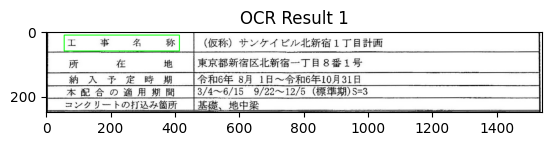

OCR Text: （称）北新宿丁目計画, Confidence: 0.8541311025619507


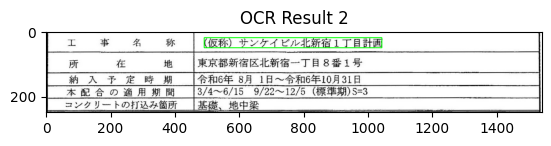

OCR Text: 所, Confidence: 0.9999685287475586


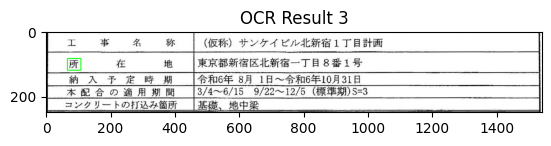

OCR Text: 在, Confidence: 0.9996997117996216


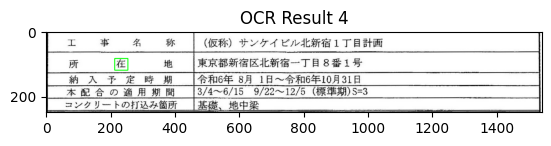

OCR Text: 地, Confidence: 0.9999812841415405


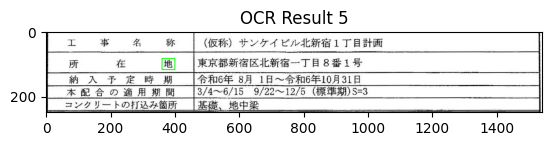

OCR Text: 东京都新宿区北新宿一丁目8番1号, Confidence: 0.9182036519050598


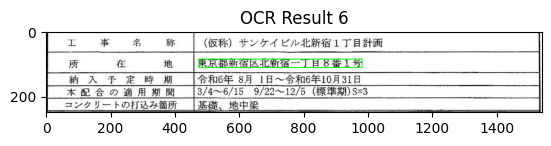

OCR Text: 納入予定時期, Confidence: 0.9570446014404297


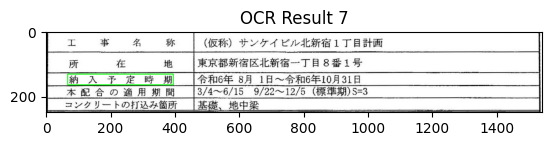

OCR Text: 合和6年8月1日~今和6年10月31日, Confidence: 0.9453455209732056


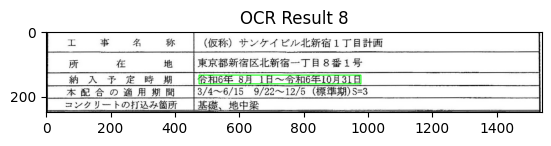

OCR Text: 本配合の適用期間, Confidence: 0.9097539782524109


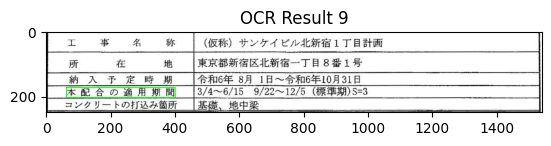

OCR Text: 3/4~6/159/22~12/5（標期）S=3, Confidence: 0.955860435962677


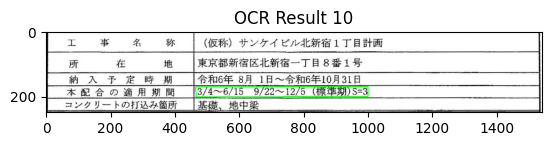

OCR Text: 打窗所, Confidence: 0.7582780718803406


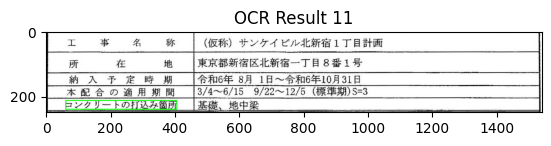

OCR Text: 基、地中梁, Confidence: 0.9798930883407593


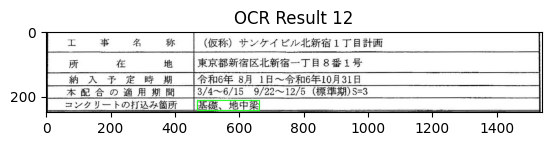

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ảnh đầu vào (ví dụ)
image = cv2.imread('cut_image_1.jpg')

# Danh sách box chứa tọa độ và kết quả OCR (từ log của bạn)
ocr_data = [
    [[[56.0, 12.0], [414.0, 12.0], [414.0, 61.0], [56.0, 61.0]], ('工事名称', 0.9996163845062256)],
    [[[491.0, 20.0], [1043.0, 20.0], [1043.0, 51.0], [491.0, 51.0]], ('（称）北新宿丁目計画', 0.8541311025619507)],
    [[[66.0, 84.0], [108.0, 84.0], [108.0, 120.0], [66.0, 120.0]], ('所', 0.9999685287475586)],
    [[[213.0, 84.0], [254.0, 84.0], [254.0, 120.0], [213.0, 120.0]], ('在', 0.9996997117996216)],
    [[[360.0, 84.0], [400.0, 84.0], [400.0, 118.0], [360.0, 118.0]], ('地', 0.9999812841415405)],
    [[[475.0, 86.0], [982.0, 86.0], [982.0, 112.0], [475.0, 112.0]], ('东京都新宿区北新宿一丁目8番1号', 0.9182036519050598)],
    [[[67.0, 132.0], [395.0, 132.0], [395.0, 165.0], [67.0, 165.0]], ('納入予定時期', 0.9570446014404297)],
    [[[475.0, 135.0], [978.0, 135.0], [978.0, 162.0], [475.0, 162.0]], ('合和6年8月1日~今和6年10月31日', 0.9453455209732056)],
    [[[63.0, 173.0], [401.0, 173.0], [401.0, 204.0], [63.0, 204.0]], ('本配合の適用期間', 0.9097539782524109)],
    [[[465.0, 171.0], [1000.0, 170.0], [1000.0, 201.0], [466.0, 202.0]], ('3/4~6/159/22~12/5（標期）S=3', 0.955860435962677)],
    [[[61.0, 213.0], [406.0, 213.0], [406.0, 240.0], [61.0, 240.0]], ('打窗所', 0.7582780718803406)],
    [[[470.0, 213.0], [663.0, 213.0], [663.0, 244.0], [470.0, 244.0]], ('基、地中梁', 0.9798930883407593)]
]

# Duyệt qua các kết quả OCR
for idx, data in enumerate(ocr_data):
    # Tạo bản sao của ảnh gốc để không thay đổi ảnh gốc trong mỗi vòng lặp
    image_copy = image.copy()
    
    # Lấy tọa độ và kết quả OCR
    points, (text, confidence) = data
    
    # Chuyển đổi tọa độ về dạng NumPy array
    points = np.array(points, np.int32)
    points = points.reshape((-1, 1, 2))  # Định dạng lại để phù hợp với yêu cầu của cv2.polylines
    
    # Vẽ tứ giác bao quanh
    cv2.polylines(image_copy, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    
    # In ra nội dung OCR và độ chính xác
    print(f"OCR Text: {text}, Confidence: {confidence}")

    # Hiển thị ảnh đã khoanh vùng
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"OCR Result {idx+1}")
    plt.show()


In [1]:
!paddleocr --image_dir ./cut_image_2_0.jpg --use_angle_cls true --use_gpu false

[2024/10/07 14:24:37] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='./cut_image_2_0.jpg', page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320

In [2]:
!paddleocr --image_dir ./cut_image_2_1_0.jpg --use_angle_cls true --use_gpu false

[2024/10/07 14:25:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='./cut_image_2_1_0.jpg', page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 3

OCR Text: 呼方横仁記载, Confidence: 0.8055402636528015


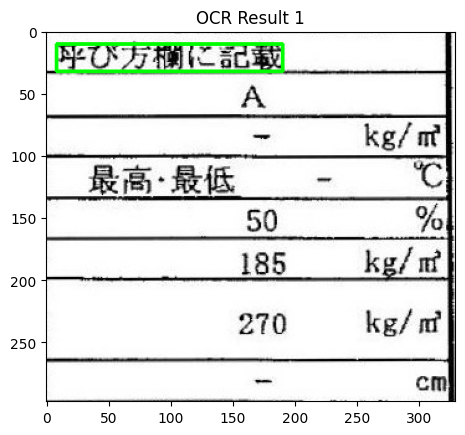

OCR Text: A, Confidence: 0.9957426190376282


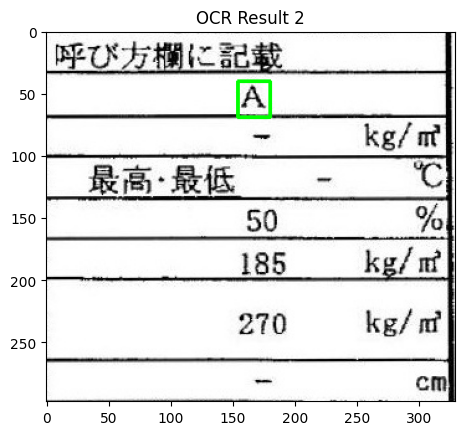

OCR Text: 二, Confidence: 0.9418596625328064


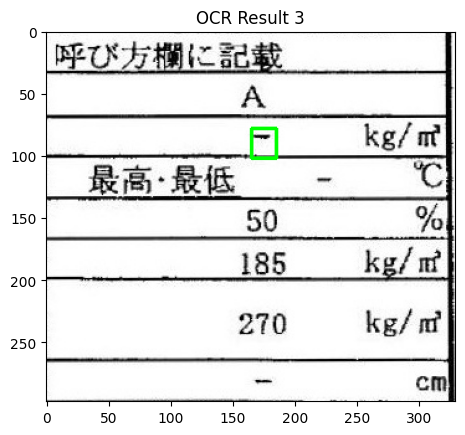

OCR Text: kg/π, Confidence: 0.8250345587730408


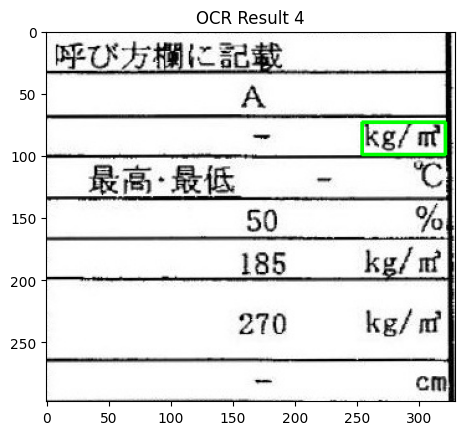

OCR Text: 最高·最低, Confidence: 0.9603019952774048


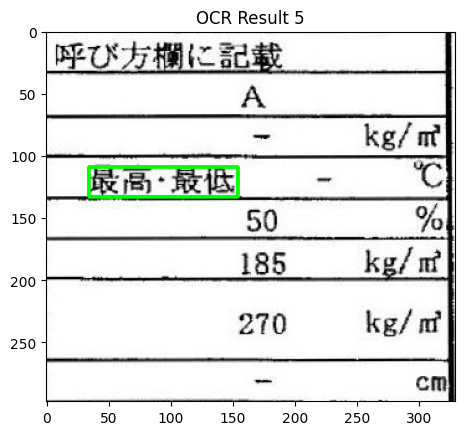

OCR Text: 一, Confidence: 0.8728858232498169


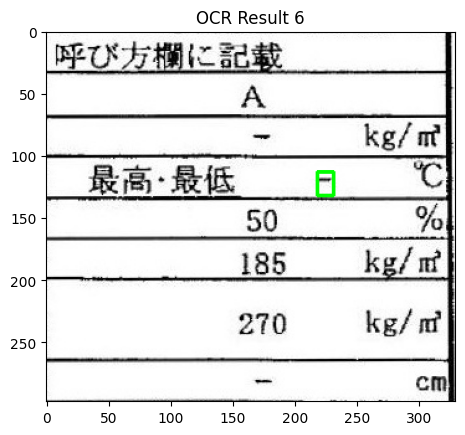

OCR Text: ℃, Confidence: 0.8480544090270996


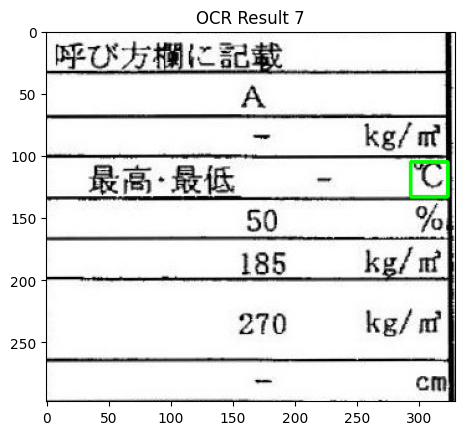

OCR Text: 50, Confidence: 0.999536395072937


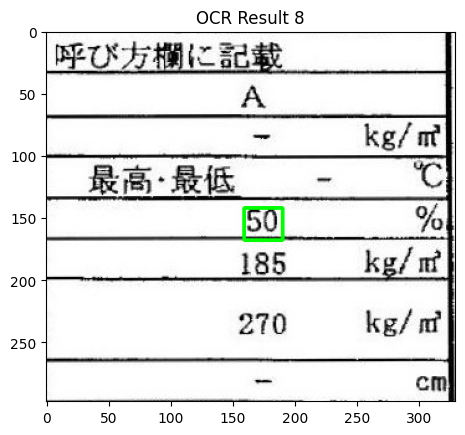

OCR Text: %, Confidence: 0.9990763664245605


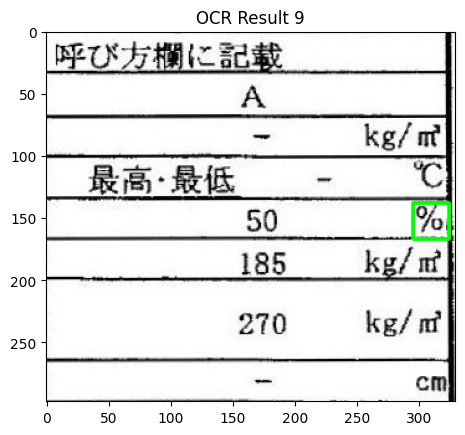

OCR Text: 185, Confidence: 0.9978291988372803


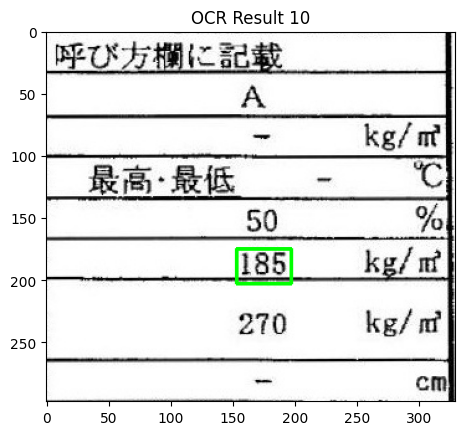

OCR Text: kg/m, Confidence: 0.8817920684814453


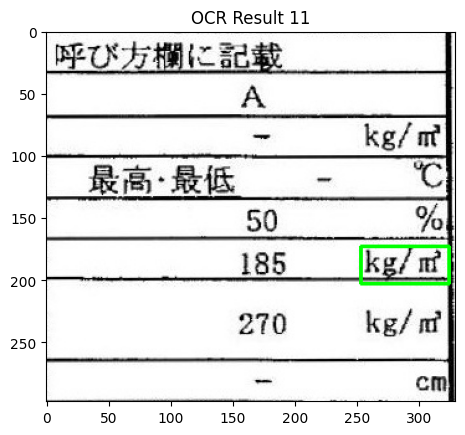

OCR Text: 270, Confidence: 0.9993227124214172


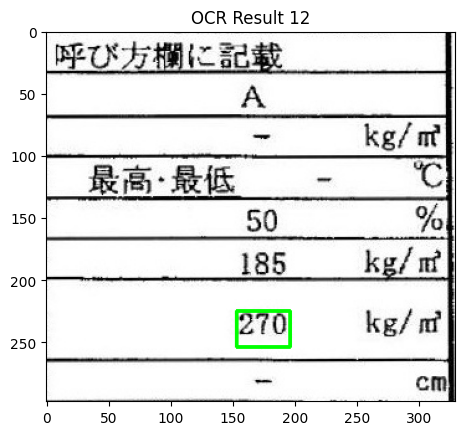

OCR Text: kg/m, Confidence: 0.880355954170227


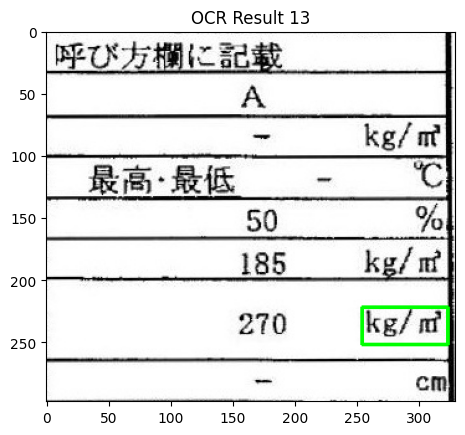

OCR Text: 一, Confidence: 0.5865931510925293


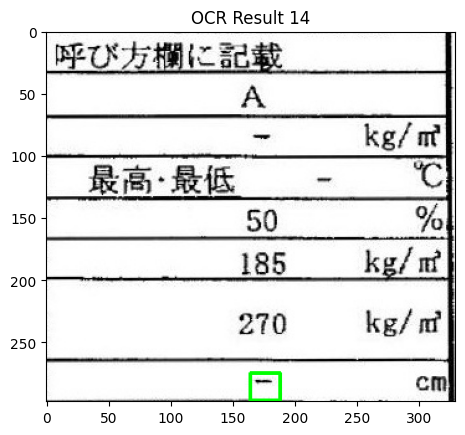

OCR Text: cm, Confidence: 0.9394874572753906


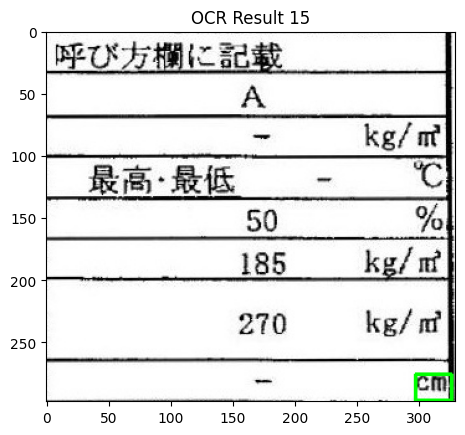

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ảnh đầu vào (ví dụ)
image = cv2.imread('cut_image_2_1_0.jpg')

# Danh sách box chứa tọa độ và kết quả OCR (từ log mới của bạn)
ocr_data = [
    [[[8.0, 10.0], [190.0, 10.0], [190.0, 32.0], [8.0, 32.0]], ('呼方横仁記载', 0.8055402636528015)],
    [[[154.0, 40.0], [180.0, 40.0], [180.0, 69.0], [154.0, 69.0]], ('A', 0.9957426190376282)],
    [[[165.0, 78.0], [185.0, 78.0], [185.0, 102.0], [165.0, 102.0]], ('二', 0.9418596625328064)],
    [[[254.0, 73.0], [321.0, 73.0], [321.0, 99.0], [254.0, 99.0]], ('kg/π', 0.8250345587730408)],
    [[[34.0, 109.0], [154.0, 109.0], [154.0, 133.0], [34.0, 133.0]], ('最高·最低', 0.9603019952774048)],
    [[[218.0, 113.0], [231.0, 113.0], [231.0, 132.0], [218.0, 132.0]], ('一', 0.8728858232498169)],
    [[[293.0, 105.0], [323.0, 105.0], [323.0, 133.0], [293.0, 133.0]], ('℃', 0.8480544090270996)],
    [[[159.0, 142.0], [190.0, 142.0], [190.0, 168.0], [159.0, 168.0]], ('50', 0.999536395072937)],
    [[[295.0, 138.0], [324.0, 138.0], [324.0, 167.0], [295.0, 167.0]], ('%', 0.9990763664245605)],
    [[[153.0, 175.0], [197.0, 175.0], [197.0, 203.0], [153.0, 203.0]], ('185', 0.9978291988372803)],
    [[[253.0, 173.0], [324.0, 173.0], [324.0, 203.0], [253.0, 203.0]], ('kg/m', 0.8817920684814453)],
    [[[153.0, 225.0], [196.0, 225.0], [196.0, 254.0], [153.0, 254.0]], ('270', 0.9993227124214172)],
    [[[254.0, 222.0], [323.0, 222.0], [323.0, 252.0], [254.0, 252.0]], ('kg/m', 0.880355954170227)],
    [[[164.0, 275.0], [188.0, 275.0], [188.0, 297.0], [164.0, 297.0]], ('一', 0.5865931510925293)],
    [[[297.0, 276.0], [326.0, 276.0], [326.0, 297.0], [297.0, 297.0]], ('cm', 0.9394874572753906)]
]

# Duyệt qua các kết quả OCR
for idx, data in enumerate(ocr_data):
    # Tạo bản sao của ảnh gốc để không thay đổi ảnh gốc trong mỗi vòng lặp
    image_copy = image.copy()
    
    # Lấy tọa độ và kết quả OCR
    points, (text, confidence) = data
    
    # Chuyển đổi tọa độ về dạng NumPy array
    points = np.array(points, np.int32)
    points = points.reshape((-1, 1, 2))  # Định dạng lại để phù hợp với yêu cầu của cv2.polylines
    
    # Vẽ tứ giác bao quanh
    cv2.polylines(image_copy, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    
    # In ra nội dung OCR và độ chính xác
    print(f"OCR Text: {text}, Confidence: {confidence}")

    # Hiển thị ảnh đã khoanh vùng
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"OCR Result {idx+1}")
    plt.show()


In [4]:
!paddleocr --image_dir ./cut_image_4_0.jpg --use_angle_cls true --use_gpu false

[2024/10/07 14:28:33] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='./cut_image_4_0.jpg', page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320

In [5]:
!paddleocr --image_dir ./cut_image_4_1.jpg --use_angle_cls true --use_gpu false

[2024/10/07 14:28:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir='./cut_image_4_1.jpg', page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\det\\ch\\ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\pduy3/.paddleocr/whl\\rec\\ch\\ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320